In [196]:
# importing the relevant Libraries


import numpy as np
import pandas as pd
import scipy.stats as st
import scipy
from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt
import seaborn as sns





# Challenge 1 - Exploring the Data

In [197]:
# In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset 
# and examining its contents. Please, load the data using Ironhack's database (db: employees, table: employees_advanced).

In [198]:
# Examine the salaries dataset using the head function below.

data = pd.read_csv('Current_Employee_Names__Salaries__and_Position_Titles.csv')
data.head(10)

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"ADRIANO, RACQUEL ANNE",PARAMEDIC,FIRE,F,Salary,NaN,72510.0,NaN
1,"AFFANEH, MAHIR A",POLICE OFFICER,POLICE,F,Salary,NaN,93354.0,NaN
2,"AFOENYI, PHYLLIS",TITLE V PROGRAM TRAINEE I,FAMILY & SUPPORT,P,Hourly,20.0,NaN,13.00
3,"AGAR, BULENT B",DEPUTY COMMISSIONER,WATER MGMNT,F,Salary,NaN,132972.0,NaN
4,"AGEE, LAWRENCE",POLICE OFFICER,POLICE,F,Salary,NaN,90024.0,NaN
5,"AGNEW, ANTONIO E",MOTOR TRUCK DRIVER,AVIATION,F,Hourly,40.0,NaN,37.45
6,"AGNEW, MELISSA M",SERGEANT,POLICE,F,Salary,NaN,111444.0,NaN
7,"AGOSTA, JOSEPH J",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,103932.0,NaN
8,"AGOSTINELLI, MICHAEL A",FIREFIGHTER (PER ARBITRATORS AWARD)-EMT,FIRE,F,Salary,NaN,107106.0,NaN
9,"AGOSTINI, LUIS R",ASST DIR,POLICE,F,Salary,NaN,95736.0,NaN


In [199]:
# We see from looking at the head function that there is quite a bit of missing data. Let's examine how much missing data 
# is in each column. Produce this output in the cell below


In [200]:
# cleaning

columns = data.columns
new_columns = []

for item in columns:
    col = item.replace(' ', '_').lower()
    new_columns.append(col)

In [201]:
data.columns = new_columns
data.head()

,name,job_titles,department,full_or_part-time,salary_or_hourly,typical_hours,annual_salary,hourly_rate
0,"ADRIANO, RACQUEL ANNE",PARAMEDIC,FIRE,F,Salary,NaN,72510.0,NaN
1,"AFFANEH, MAHIR A",POLICE OFFICER,POLICE,F,Salary,NaN,93354.0,NaN
2,"AFOENYI, PHYLLIS",TITLE V PROGRAM TRAINEE I,FAMILY & SUPPORT,P,Hourly,20.0,NaN,13.0
3,"AGAR, BULENT B",DEPUTY COMMISSIONER,WATER MGMNT,F,Salary,NaN,132972.0,NaN
4,"AGEE, LAWRENCE",POLICE OFFICER,POLICE,F,Salary,NaN,90024.0,NaN


In [202]:

data.isnull().sum()

name                     0
job_titles               0
department               0
full_or_part-time        0
salary_or_hourly         0
typical_hours        25528
annual_salary         8174
hourly_rate          25528
dtype: int64

In [203]:
data.nunique()

name                 33380
job_titles            1119
department              36
full_or_part-time        2
salary_or_hourly         2
typical_hours            4
annual_salary          924
hourly_rate            178
dtype: int64

In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33702 entries, 0 to 33701
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               33702 non-null  object 
 1   job_titles         33702 non-null  object 
 2   department         33702 non-null  object 
 3   full_or_part-time  33702 non-null  object 
 4   salary_or_hourly   33702 non-null  object 
 5   typical_hours      8174 non-null   float64
 6   annual_salary      25528 non-null  float64
 7   hourly_rate        8174 non-null   float64
dtypes: float64(3), object(5)
memory usage: 2.1+ MB


In [205]:
# Let's also look at the count of hourly vs. salaried employees. Write the code in the cell below




In [206]:
data['hourly_rate'].value_counts(dropna=False)

NaN      25528
37.45     1495
43.72      779
38.52      528
19.86      345
         ...  
33.00        1
52.43        1
26.90        1
21.84        1
37.69        1
Name: hourly_rate, Length: 179, dtype: int64

In [207]:
data['annual_salary'].value_counts(dropna=False)

NaN         8174
90024.0     1743
84054.0     1500
93354.0     1469
72510.0     1307
            ... 
113304.0       1
107112.0       1
80088.0        1
69720.0        1
65976.0        1
Name: annual_salary, Length: 925, dtype: int64

In [208]:
# put the two features next to each other so that we can compare them :


data[['annual_salary','hourly_rate']].head(20)

,annual_salary,hourly_rate
0,72510.0,NaN
1,93354.0,NaN
2,NaN,13.00
3,132972.0,NaN
4,90024.0,NaN
5,NaN,37.45
6,111444.0,NaN
7,103932.0,NaN
8,107106.0,NaN
9,95736.0,NaN


In [209]:
# What this information indicates is that the table contains information about two types of employees - salaried and hourly. 
# Some columns apply only to one type of employee while other columns only apply to another kind. 
#This is why there are so many missing values. Therefore, we will not do anything to handle the missing values.



In [210]:
# There are different departments in the city. List all departments and the count of employees in each department.

count_of_employees = data.groupby(['department'])['department'].count()
count_of_employees

department
ADMIN HEARNG              38
ANIMAL CONTRL             75
AVIATION                1856
BOARD OF ELECTION        111
BOARD OF ETHICS            8
BUDGET & MGMT             44
BUILDINGS                258
BUSINESS AFFAIRS         167
CITY CLERK                88
CITY COUNCIL             362
COPA                     123
CULTURAL AFFAIRS          74
DAIS                    1033
DISABILITIES              28
FAMILY & SUPPORT         656
FINANCE                  544
FIRE                    4627
HEALTH                   467
HOUSING                   66
HOUSING & ECON DEV       154
HUMAN RELATIONS           17
HUMAN RESOURCES           75
INSPECTOR GEN             95
LAW                      398
LICENSE APPL COMM          1
MAYOR'S OFFICE           104
OEMC                    1737
POLICE                 13848
POLICE BOARD               2
PROCUREMENT               84
PUBLIC LIBRARY          1088
PUBLIC SAFETY ADMIN      244
STREETS & SAN           2175
TRANSPORTN              1113
TRE

# Challenge 2 - Hypothesis Tests

In [211]:
# In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different 
# from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided 
# confidence interval.

<AxesSubplot:>

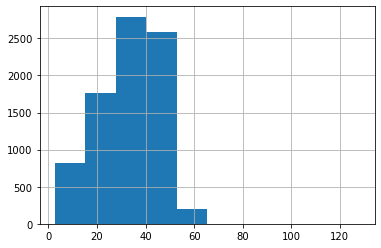

In [212]:
hour_rate = data['hourly_rate'].dropna()
hour_rate.hist()

In [213]:

# H0: value = 30/h
# H1: value != 30/h

stat, pval = ttest_1samp(hour_rate, 30)
print('stat is  ', stat)
print('pvalue for the two-tailed test is ', pval)
if pval < 0.05:
    print('reject null hypothesis')
else:
    print('cannot reject null hypothesis')

stat is   31.211500329216044
pvalue for the two-tailed test is  3.825475847673794e-202
reject null hypothesis


<AxesSubplot:>

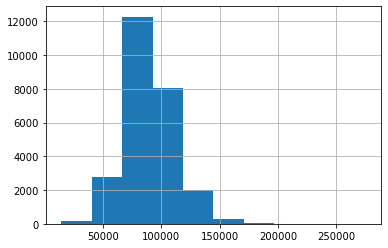

In [214]:
a_salary = data['annual_salary'].dropna()
a_salary.hist()

In [215]:
a_salary.mean()

89061.79499999997

In [216]:
# We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing 
# that salaries this year are higher than last year's mean of $86000/year a year for all salaried employees. 
# Test this one sided hypothesis using a 95% confidence interval.


# H0: salaries this year <= 86000 
# H1: salaries this year > 86000


stat, pval = ttest_1samp(a_salary, 86000)
print('stat is  ', stat)
print('pvalue for the two-tailed test is ', pval/2)
if pval/2 < 0.05:
    print('reject null hypothesis')
else:
    print('cannot reject null hypothesis')
    
   

stat is   23.149576589194083
pvalue for the two-tailed test is  1.1882570425863358e-117
reject null hypothesis


In [217]:
# Using the crosstab function, find the department that has the most hourly workers.    


data.head()

,name,job_titles,department,full_or_part-time,salary_or_hourly,typical_hours,annual_salary,hourly_rate
0,"ADRIANO, RACQUEL ANNE",PARAMEDIC,FIRE,F,Salary,NaN,72510.0,NaN
1,"AFFANEH, MAHIR A",POLICE OFFICER,POLICE,F,Salary,NaN,93354.0,NaN
2,"AFOENYI, PHYLLIS",TITLE V PROGRAM TRAINEE I,FAMILY & SUPPORT,P,Hourly,20.0,NaN,13.0
3,"AGAR, BULENT B",DEPUTY COMMISSIONER,WATER MGMNT,F,Salary,NaN,132972.0,NaN
4,"AGEE, LAWRENCE",POLICE OFFICER,POLICE,F,Salary,NaN,90024.0,NaN


In [218]:


data_crosstab = pd.crosstab(data['department'], data['hourly_rate'], margins = True)
data_crosstab

hourly_rate,2.65,8.25,9.74,10.0,10.5,12.0,13.0,13.4,13.45,13.94,14.0,14.1,14.11,14.54,14.66,14.95,15.0,15.05,15.22,15.38,15.55,15.75,15.94,16.0,16.05,16.55,16.65,16.88,17.0,17.42,18.0,18.01,18.22,18.44,18.45,18.52,18.7,18.85,19.38,19.86,19.88,20.0,20.05,20.31,20.5,21.3,21.38,21.73,21.84,22.0,22.05,22.1,22.35,22.36,22.38,22.5,22.74,22.75,23.0,23.05,23.1,23.3,23.38,23.46,23.74,24.0,24.1,24.19,24.34,24.46,24.94,24.98,25.0,25.19,25.47,25.72,25.95,26.23,26.59,26.71,26.9,27.03,27.34,27.75,28.0,28.85,29.16,29.39,29.96,29.97,30.0,30.6,31.12,31.7,32.14,32.22,32.85,33.0,33.32,33.71,33.72,34.58,34.74,34.83,34.98,35.7,35.95,36.45,36.5,37.0,37.35,37.45,37.69,38.01,38.09,38.11,38.52,39.09,39.42,39.51,39.64,39.84,40.78,40.8,41.54,41.65,43.35,43.72,44.04,44.22,44.52,44.62,44.74,44.82,44.85,45.5,46.25,46.88,47.3,47.33,47.54,48.1,48.11,48.25,48.55,48.75,48.93,49.14,49.26,49.35,49.6,49.8,50.05,50.15,50.5,50.63,51.0,51.05,51.1,51.43,51.57,51.63,51.85,52.35,52.43,52.55,52.6,52.63,53.21,53.4,53.91,54.05,54.1,55.1,57.04,58.4,61.65,128.0,All
department,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ANIMAL CONTRL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12
AVIATION,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,24,0,0,11,0,0,5,2,3,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,0,3,0,8,0,1,0,5,24,29,0,0,3,5,4,0,0,0,1,0,3,0,0,0,9,0,0,7,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,58,1,0,0,0,0,0,0,0,0,0,94,0,0,0,0,0,3,0,0,0,0,0,527,0,0,53,7,0,9,0,10,0,5,0,0,0,0,0,16,0,0,0,0,0,5,0,4,0,0,23,1,0,0,2,0,18,0,8,1,49,71,10,0,0,0,0,0,0,0,4,1,0,0,39,10,0,0,1,0,2,0,0,0,0,0,12,0,0,0,1214
BUDGET & MGMT,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
BUSINESS AFFAIRS,0,0,0,0,0,0,2,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
CITY COUNCIL,0,4,0,2,1,5,5,0,1,0,1,0,0,0,0,0,20,0,0,0,0,1,0,3,0,0,0,0,3,0,6,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,74
CULTURAL AFFAIRS,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
DAIS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0,93,0,0,0,4,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,0,11,0,9,0,0,2,1,0,0,0,0,4,0,0,23,0,0,0,0,0,1,2,7,0,2,16,3,0,20,0,0,28,0,164,1,0,119,10,0,1,2,1,0,11,3,0,24,0,0,71,11,1,0,1,0,3,0,0,1,24,4,10,0,0,0,745
DISABILITIES,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [219]:
# The workers from the department with the most hourly workers have complained that their hourly wage is less than $35/hour. 
# Using a one sample t-test, test this one-sided hypothesis at the 95% confidence level.

<AxesSubplot:>

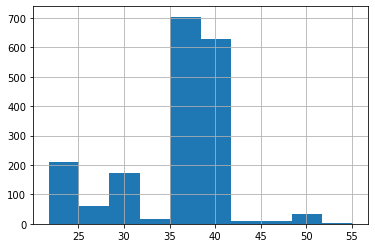

In [220]:

streets_department = data[data['department'] == 'STREETS & SAN']
streets_rate = streets_department['hourly_rate'].dropna()
streets_rate.hist()

In [221]:
streets_rate.mean()

35.55229685807062

In [222]:
#  H0: value =  35 
#  H1: value != 35

stat, pval = ttest_1samp(streets_rate, 35)
print('stat is  ', stat)
print('pvalue for the two-tailed test is ', pval/2)
if pval/2 < 0.05:
    print('reject null hypothesis')
else:
    print('cannot reject null hypothesis')
    
    
# we can reject the null hypothesis which means the population mean is different to 35 
# The stat is positive, so the popoulation mean is significantly greater than 35



stat is   4.000138803968834
pvalue for the two-tailed test is  3.2902372218867895e-05
reject null hypothesis


# Challenge 3: To practice - Constructing Confidence Intervals

In [223]:

# To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees 
# of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error 
# can be computed using this function in SciPy.

In [224]:
# Your code here:
confidence_level = 0.95
degrees_freedom = len(hour_rate) - 1
sample_mean = np.mean(hour_rate)
sample_standard_error = scipy.stats.sem(hour_rate)

In [225]:

C_I = scipy.stats.t.interval(confidence_level, 
                                             degrees_freedom, 
                                             sample_mean, 
                                             sample_standard_error)

print( 'The confidence interval is ', C_I, '.' )

The confidence interval is  (34.29839539204361, 34.874504045197305) .
